In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
import utilities

%load_ext autoreload
%autoreload 2

# Questions:
> * 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
> * 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
> * 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
> * 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
> * 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
> * 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
> * 7. Which lessons are least accessed?
> * 8. Anything else I should be aware of?



In [2]:
df = wrangle.wrangle_logs()

# Question 1:

**Key Conclusion:** answer answer answer answer

In [3]:
# Visualization

In [4]:
# any explanation of the visualization you feel is necessary.

# Question 2:

**Key Conclusion:** Answer answer answer

In [5]:
# Visualization

In [6]:
# Any explanation of the visualization you feel is necessary

# Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?

**Key Conclusion:** 
For the Web Development program Java lessons account for 21.5%, Javascript lessons account for 20.6%, and Spring lessons account for 13.3% of all content accessed by WebDev grads after graduation. Of note, the top four most accessed lessons were all covering Spring.

For the Data Science program SQL lessons account for 16.2%, Fundamentals lessons account for 15.8%, and Classification lessons account for 13.7% of all content accessed by DS grads after graduation.

In [7]:
df = wrangle.wrangle_logs()

In [8]:
# Dropping staff from the dataframe so as to only evaluate students
cleaned = df[df.name != 'Staff']

# Since the '/' and the 'search/search_index.json' paths are not actual topic locations, I will drop these two paths.
cleaned = cleaned[(cleaned.path != '/') & (cleaned.path != 'search/search_index.json')]

# Removing any access logs that occurred prior the the cohort finishing at Codeup as the question asks about post 
# graduation access.
cleaned = cleaned[cleaned.date > cleaned.end_date]

When comparing program ids to cohort names, according to the https://alumni.codeup.com/ website the id columns corresponds as follows:
- Program ids 1, 2, 4 are all WebDev cohorts
- Program 3 is a Data Scientist cohort

In [9]:
# Splitting the dataframe into Data Science and Web Development students
ds = cleaned[cleaned.program_id == 3]
webdev = cleaned[cleaned.program_id != 3]

#### Now examining just the Web Development graduates' access logs.

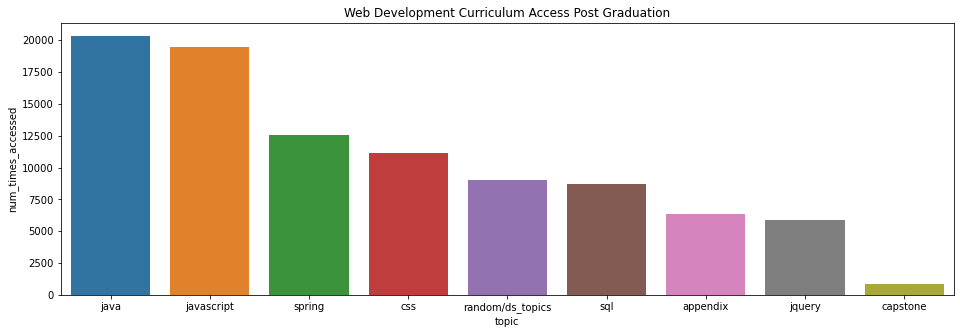

The two largest subgroups are as follows:
Java accounts for 21.54% 
Javascript accounts for 20.66%


In [11]:
utilities.webdev_visuals(webdev)

#### Now I will show the individual lessons that were most viewed for Web Development students after graduation.

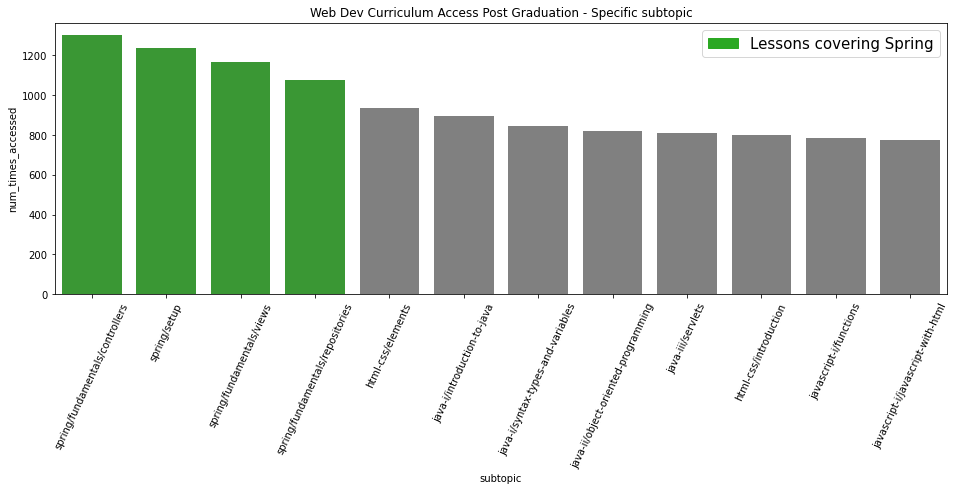

In [13]:
utilities.webdev_subtopics()

#### Lessons covering Spring were the top 4 accessed individual lessons. This is interesting since by topic Spring accounts for significantly less access than Java or Javascript.

#### Now examining just the Data Science graduates' access logs.

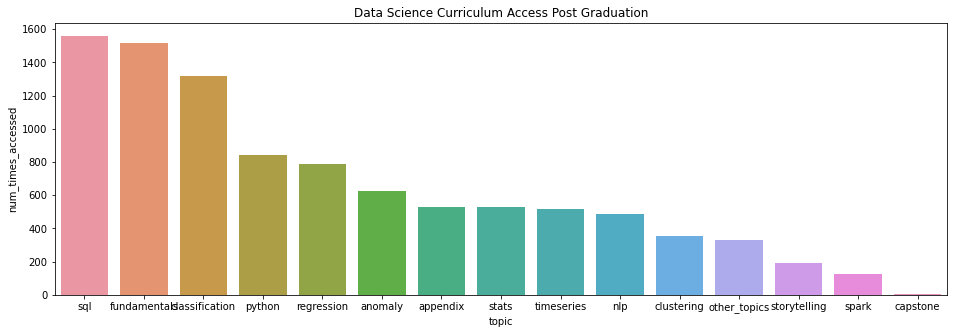

The largest subgroups are as follows:
SQL accounts for 16.23% 
Fundamentals accounts for 15.83%
Classification accounts for 13.7%


In [12]:
utilities.ds_visuals(ds)

# Question 7: Which Lessons Are Least Accessed?

**Key Takeaway:** 
> * **450** of the **2300** **(~20%)** pages have been accessed only once

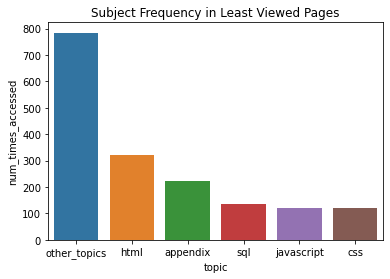

In [15]:
utilities.create_least_viewed_viz(df)

**Other Takeaways:**
* 'Other topics' and 'appendix' are **40%** of all topics for paths that have only been viewed once.
* All other categories (**26** categories out of **28** total) create the other **~60%**
* **20%** of paths accessed once have file extensions for their endpoint (.jpg, .zip, .csv, etc.)
* Because such a large portion of paths have only been accessed once, it's difficult to state a clear distinction by category or lesson.